In [70]:
## Import Required lib's
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
## Importing dataset
mydata = pd.read_csv("housing.csv")

In [72]:
mydata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [73]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
ocean_proximity       20640 non-null object
median_house_value    20640 non-null int64
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [74]:
#Describe data
mydata.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [75]:
#Get number of Null Values
def get_null_count(mydata):
    for i in mydata.columns:
        print(i,': ',len(mydata[mydata[i].isnull()][i]))
get_null_count(mydata)

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  207
population :  0
households :  0
median_income :  0
ocean_proximity :  0
median_house_value :  0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000269B5392F28>]],
      dtype=object)

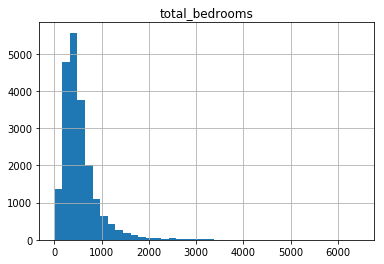

In [79]:
#Hist plot
mydata.hist(column='total_bedrooms',bins=40)

In [80]:
#Imputation
#From hist plot we could say data is right sweked, so it's better to apply Median to replace missing values instead of Mean
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
mydata[['total_bedrooms']]=imputer.fit_transform(mydata[['total_bedrooms']])

In [81]:
#Now replaced all Null values with mean and we could see from function we don't have any Null values
def get_null_count(mydata):
    for i in mydata.columns:
        print(i,': ',len(mydata[mydata[i].isnull()][i]))
get_null_count(mydata)        

longitude :  0
latitude :  0
housing_median_age :  0
total_rooms :  0
total_bedrooms :  0
population :  0
households :  0
median_income :  0
ocean_proximity :  0
median_house_value :  0


In [82]:
#Diving data set to indipendent and depenent variables
iv = mydata[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']]
dv = mydata['median_house_value']

In [83]:
#Label encoding and One Hot encoding for categorical variables
iv = pd.get_dummies(iv)

In [84]:
#Dividing the Dataset into Test and Train
from sklearn.model_selection import train_test_split
iv_train,iv_test,dv_train,dv_test=train_test_split(iv,dv,test_size=0.2,random_state=0)

In [85]:
#Applying LinearRegression, In Linear Regression scalling is done by Algorithum 
from sklearn.linear_model import LinearRegression
lin_regressor= LinearRegression()
lin_regressor.fit(iv_train,dv_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
#Linear prediction
linear_pred = lin_regressor.predict(iv_test)
actual = dv_test
predicted = linear_pred

In [87]:
## To find RMSE for Linear regression
linear_RMSE = round(np.sqrt(np.mean(actual - predicted)**2),2)

In [88]:
## Applying scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
iv_train = sc.fit_transform(iv_train)
iv_test = sc.transform(iv_test)

In [89]:
## Applying Decission Tree
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth=3)
dt_regressor.fit(iv_train,dv_train)
dt_predt = dt_regressor.predict(iv_test)

In [90]:
actual_dt = dv_test
predicted_dt = dt_predt

In [91]:
## To find RMSE for decision Tree 
dt_RMSE = round(np.sqrt(np.mean(actual_dt - predicted_dt)**2),2)

In [92]:
## Applying RandomForest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=1)
rf_classifier.fit(iv_train,dv_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
rf_predict = rf_classifier.predict(iv_test)
actual_rf = dv_test
predicted_rf = rf_predict

In [94]:
## To find RMSE for Random Forest
rf_RMSE = round(np.sqrt(np.mean(actual_rf - predicted_rf)**2),2)

In [102]:
## RMSE for Liner Regression, Decission Tree and Random Forrest as follows
print("RMSE for Linear Regression:{}".format(linear_RMSE))
print("RMSE for Decission Tree:{}".format(dt_RMSE))
print("RMSE for Random Forrest:{}".format(rf_RMSE))

RMSE for Linear Regression:1066.62
RMSE for Decission Tree:909.97
RMSE for Random Forrest:476.79


In [103]:
mydata.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [104]:
#Bonus exercise:
iv = mydata.iloc[:,7]
dv = mydata.iloc[:,-1]

In [105]:
from sklearn.model_selection import train_test_split
iv_train_med,iv_test_med,dv_train_med,dv_test_med=train_test_split(iv,dv,test_size=0.2,random_state=0)
iv_train_med=np.array(iv_train_med).reshape(len(iv_train_med),1)
dv_train_med=np.array(dv_train_med).reshape(len(dv_train_med),1)
iv_test_med = np.array(iv_test_med).reshape(len(iv_test_med),1)
dv_test_med = np.array(dv_test_med).reshape(len(dv_test_med),1) 

In [106]:
# predicting housing values using Linear regression from median_income
from sklearn.linear_model import LinearRegression
med_linear = LinearRegression()
med_linear.fit(iv_train_med,dv_train_med)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
y_pred_med = med_linear.predict(iv_test_med)

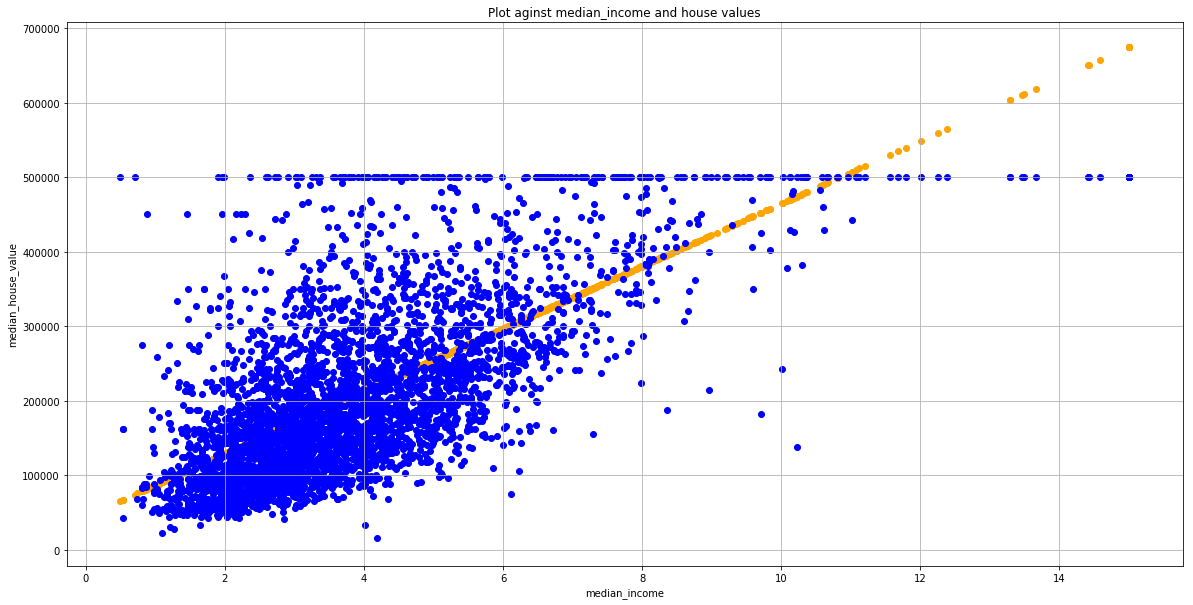

In [108]:
#Plotting Test data and Predicted data
%matplotlib inline
plt.figure(figsize=(20,10))
plt.scatter(iv_test_med, y_pred_med, color='orange')
plt.scatter(iv_test_med, dv_test_med, color = 'blue' )
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Plot aginst median_income and house values')
plt.grid()
plt.show()